[*********************100%%**********************]  1 of 1 completed
Epoch [1/100], Loss: 9741.0439
Epoch [2/100], Loss: 9736.2754
Epoch [3/100], Loss: 9731.4492
Epoch [4/100], Loss: 9726.5508
Epoch [5/100], Loss: 9721.5635
Epoch [6/100], Loss: 9716.4707
Epoch [7/100], Loss: 9711.2529
Epoch [8/100], Loss: 9705.8936
Epoch [9/100], Loss: 9700.3701
Epoch [10/100], Loss: 9694.6621
Epoch [11/100], Loss: 9688.7441
Epoch [12/100], Loss: 9682.5879
Epoch [13/100], Loss: 9676.1641
Epoch [14/100], Loss: 9669.4463
Epoch [15/100], Loss: 9662.4092
Epoch [16/100], Loss: 9655.0264
Epoch [17/100], Loss: 9647.2871
Epoch [18/100], Loss: 9639.1826
Epoch [19/100], Loss: 9630.7314
Epoch [20/100], Loss: 9621.9590
Epoch [21/100], Loss: 9612.9033
Epoch [22/100], Loss: 9603.6045
Epoch [23/100], Loss: 9594.0859
Epoch [24/100], Loss: 9584.3740
Epoch [25/100], Loss: 9574.4893
Epoch [26/100], Loss: 9564.4629
Epoch [27/100], Loss: 9554.3447
Epoch [28/100], Loss: 9544.1914
Epoch [29/100], Loss: 9534.0371
Epoch [30/10

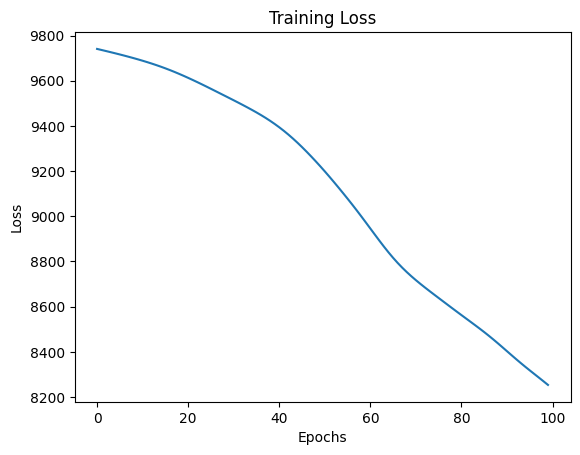

In [5]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import yfinance as yf
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def download_stock_data(symbol, start_date, end_date):
    df = yf.download(symbol, start=start_date, end=end_date)
    return df

def prepare_data(data, sequence_length):
    data = data['Close'].values
    sequences = []
    targets = []

    for i in range(len(data) - sequence_length):
        sequence = data[i:i+sequence_length]
        target = data[i+sequence_length]
        sequences.append(sequence)
        targets.append(target)

    return np.array(sequences), np.array(targets)

# Hyperparameters
sequence_length = 10
hidden_size = 64
num_layers = 1
learning_rate = 0.001
epochs = 100

stock_data = download_stock_data("AAPL", "2020-01-01", "2021-01-01")
sequences, targets = prepare_data(stock_data, sequence_length)

sequences = torch.Tensor(sequences).to(device)
targets = torch.Tensor(targets).to(device)

class StockPricePredictor(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(StockPricePredictor, self).__init__()
        self.rnn = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])
        return out

model = StockPricePredictor(1, hidden_size, num_layers, 1).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

losses = []

for epoch in range(epochs):
    outputs = model(sequences.view(-1, sequence_length, 1))
    optimizer.zero_grad()
    loss = criterion(outputs.view(-1), targets)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    if (epoch + 1) % 1 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

print('Training finished.')

# Plot learning curve
plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()


In [6]:
initial_balance = 10000.0
balance = initial_balance
profits = []

for i in range(len(sequences)):
    # Predict the stock price for the next day
    predicted_price = model(sequences[i].view(1, sequence_length, 1)).item()

    # Calculate the profit based on the actual price of the next day
    actual_price = targets[i].item()
    profit = actual_price - predicted_price

    # Update the balance based on the profit
    balance += profit
    profits.append(profit)

print('Initial Balance: ${:.2f}'.format(initial_balance))
print('Final Balance: ${:.2f}'.format(balance))
print('Total Profit/Loss: ${:.2f}'.format(balance - initial_balance))

# Print daily profits
for day, profit in enumerate(profits, 1):
    print('Day {}: ${:.2f}'.format(day, profit))

Initial Balance: $10000.00
Final Balance: $31400.91
Total Profit/Loss: $21400.91
Day 1: $70.71
Day 2: $71.58
Day 3: $71.05
Day 4: $71.33
Day 5: $71.71
Day 6: $71.48
Day 7: $69.14
Day 8: $71.32
Day 9: $72.99
Day 10: $72.87
Day 11: $69.29
Day 12: $69.06
Day 13: $71.61
Day 14: $72.26
Day 15: $73.21
Day 16: $71.92
Day 17: $72.29
Day 18: $71.81
Day 19: $73.71
Day 20: $73.13
Day 21: $73.15
Day 22: $71.66
Day 23: $72.81
Day 24: $71.98
Day 25: $70.17
Day 26: $66.45
Day 27: $63.91
Day 28: $65.04
Day 29: $60.26
Day 30: $60.21
Day 31: $66.57
Day 32: $64.21
Day 33: $67.56
Day 34: $65.11
Day 35: $64.14
Day 36: $58.42
Day 37: $63.20
Day 38: $60.73
Day 39: $53.92
Day 40: $61.33
Day 41: $52.41
Day 42: $55.05
Day 43: $53.50
Day 44: $53.03
Day 45: $49.14
Day 46: $47.91
Day 47: $53.53
Day 48: $53.20
Day 49: $56.43
Day 50: $53.77
Day 51: $55.53
Day 52: $55.41
Day 53: $52.06
Day 54: $53.06
Day 55: $52.18
Day 56: $57.44
Day 57: $56.69
Day 58: $58.36
Day 59: $58.84
Day 60: $60.16
Day 61: $63.62
Day 62: $62.9